In [1]:
# @title PART 1
pip install pandas requests beautifulsoup4 nltk matplotlib seaborn scikit-learn

In [2]:
# @title Extracting data using API.

import requests
import pandas as pd

from datetime import datetime

def get_crypto_data(crypto_id, days):
    url = f'https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart?vs_currency=usd&days={days}'
    response = requests.get(url)
    data = response.json()

    prices = data['prices']
    market_caps = data['market_caps']
    total_volumes = data['total_volumes']

    df = pd.DataFrame({
        'timestamp': [datetime.fromtimestamp(x[0] / 1000.0) for x in prices],
        'price': [x[1] for x in prices],
        'market_cap': [x[1] for x in market_caps],
        'total_volume': [x[1] for x in total_volumes]
    })

    return df

# Get data for Bitcoin according to number of days as per our requirement.
bitcoin_data = get_crypto_data('bitcoin', 365)
bitcoin_data.head()

,timestamp,price,market_cap,total_volume
0,2023-08-12,29396.847971,5.719766e+11,4.651950e+09
1,2023-08-13,29412.142275,5.722578e+11,3.994298e+09
2,2023-08-14,29284.969714,5.696871e+11,4.755220e+09
3,2023-08-15,29400.586804,5.722427e+11,1.240836e+10
4,2023-08-16,29170.490397,5.674983e+11,1.152340e+10


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get data for Bitcoin
bitcoin_data = get_crypto_data('bitcoin', 365)

# Extract prices from the DataFrame
prices = bitcoin_data['price']

# Basic statistics
print(prices.describe())

count      365.000000
mean     49408.648482
std      15745.045826
min      25133.303107
25%      35965.360361
50%      47143.242991
75%      64844.674418
max      73097.767027
Name: price, dtype: float64


In [11]:
# Handle missing values
prices.dropna(inplace=True)

# Convert data types directly from Series to float
prices = prices.astype(float)


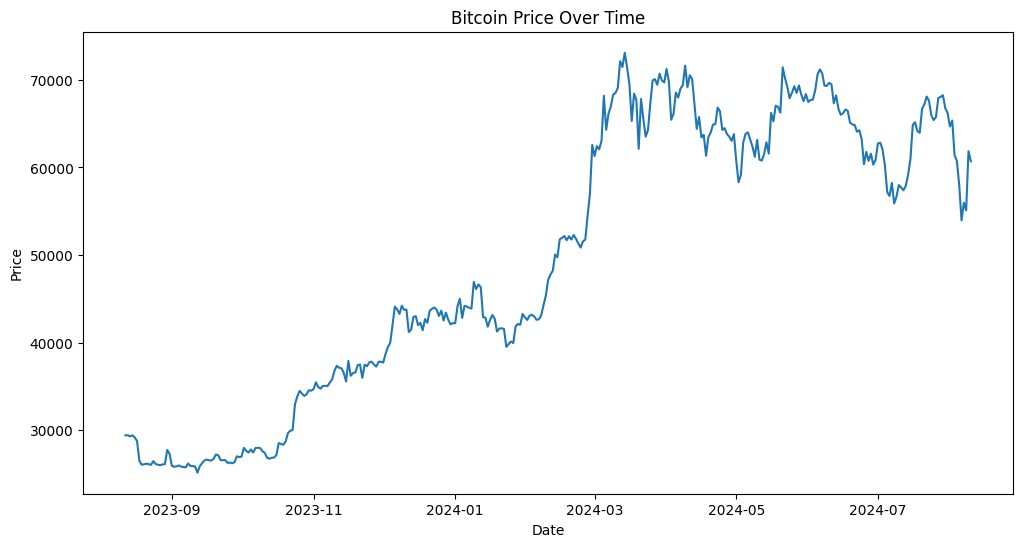

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get data for Bitcoin
bitcoin_data = get_crypto_data('bitcoin', 365)

# Visualization, use the DataFrame directly
plt.figure(figsize=(12, 6))
# Pass the entire DataFrame, and specify x and y columns
sns.lineplot(data=bitcoin_data, x='timestamp', y='price')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')  # Set x-axis label
plt.ylabel('Price')  # Set y-axis label
plt.show()

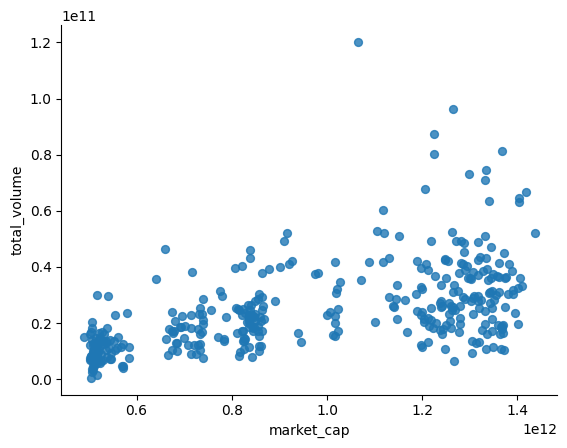

In [5]:
# @title market_cap vs total_volume

from matplotlib import pyplot as plt
bitcoin_data.plot(kind='scatter', x='market_cap', y='total_volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

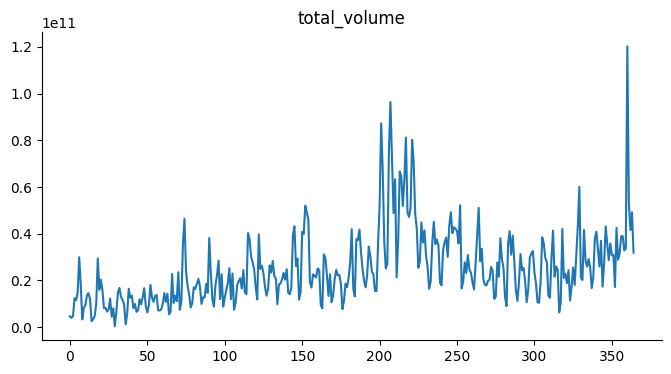

In [6]:
# @title total_volume

from matplotlib import pyplot as plt
bitcoin_data['total_volume'].plot(kind='line', figsize=(8, 4), title='total_volume')
plt.gca().spines[['top', 'right']].set_visible(False)

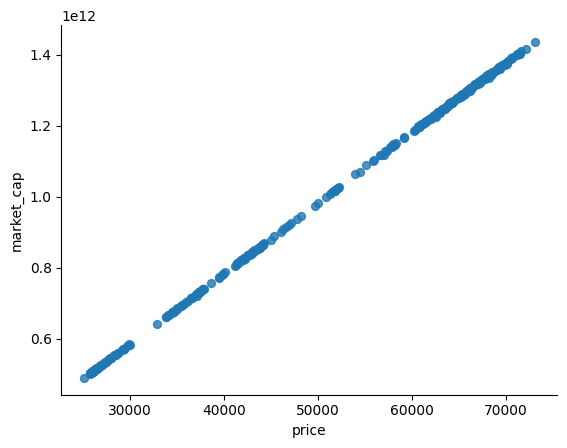

In [7]:
# @title price vs market_cap

from matplotlib import pyplot as plt
bitcoin_data.plot(kind='scatter', x='price', y='market_cap', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

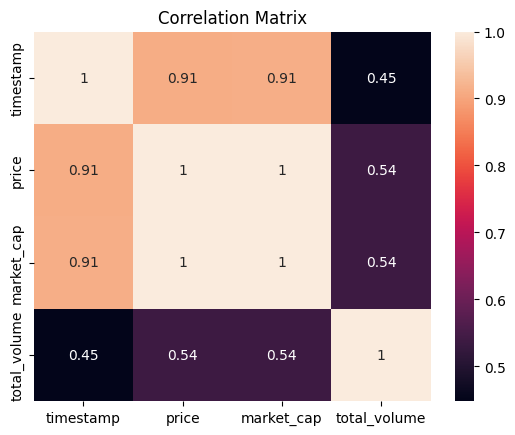

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get data for Bitcoin
bitcoin_data = get_crypto_data('bitcoin', 365)

correlation_matrix = bitcoin_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

<ipython-input-9-5b029c29e69b>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_features['price'], ax=axes[1, 0])


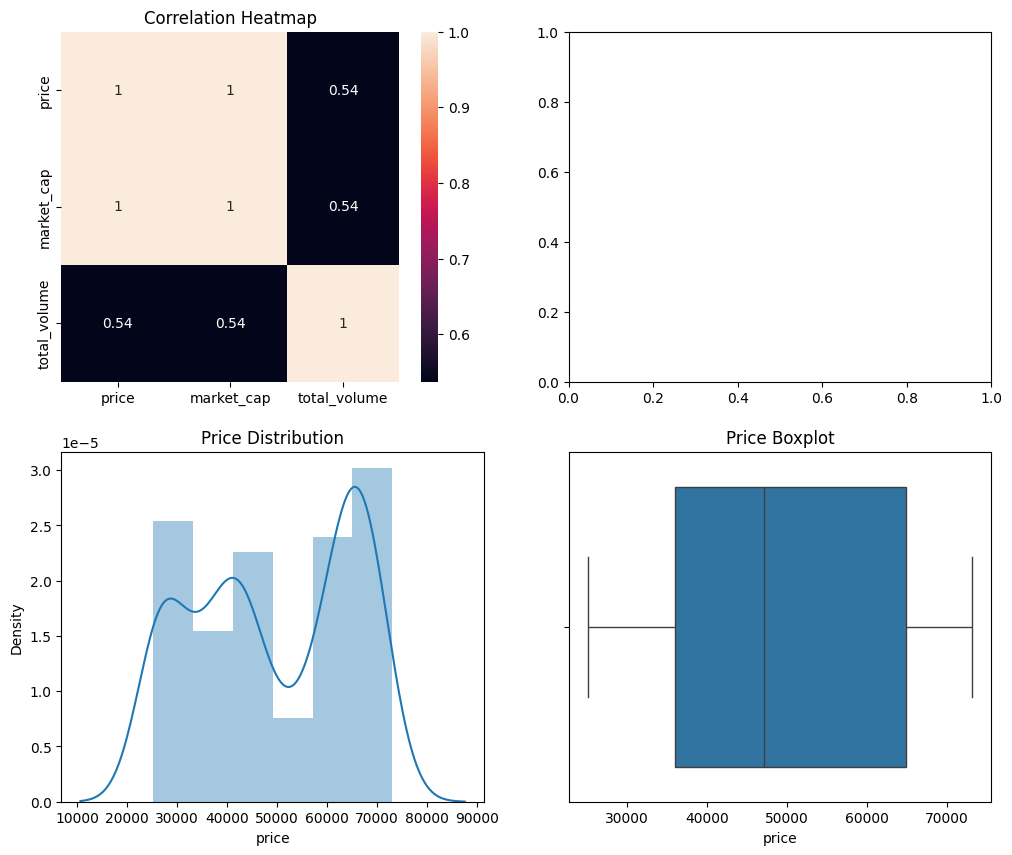

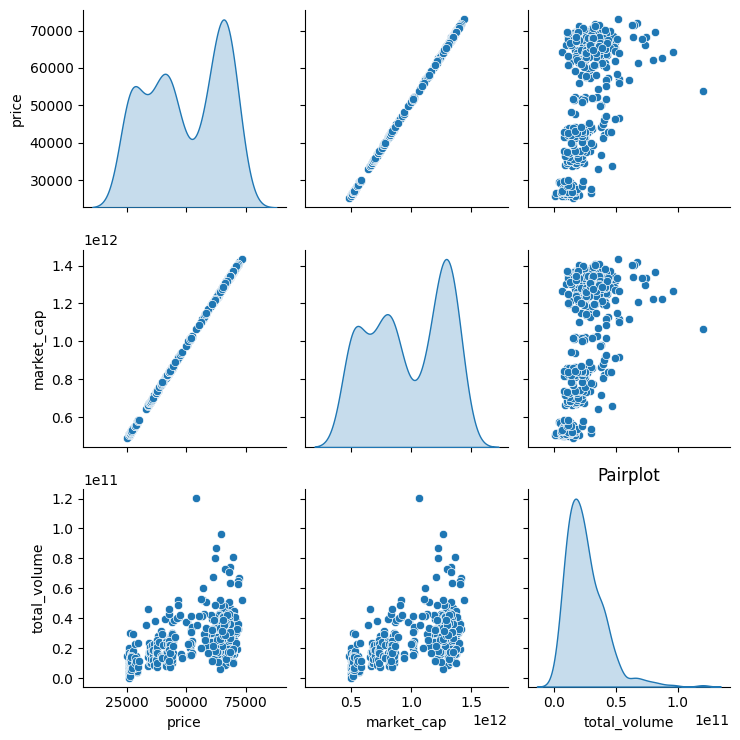

In [9]:
# @title Compilation of different Data Visulization.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'timestamp' to datetime object if it's not already
bitcoin_data['timestamp'] = pd.to_datetime(bitcoin_data['timestamp'])

# Extract numerical features for correlation analysis
numerical_features = bitcoin_data.select_dtypes(include=['number'])

correlation_matrix = numerical_features.corr()



# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot different aspects of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, ax=axes[0, 0])
axes[0, 0].set_title('Correlation Heatmap')

# Remove the 'ax' argument from sns.pairplot
sns.pairplot(numerical_features, diag_kind='kde') # Pairplot does not support specifying an axes object
plt.title('Pairplot') # Set the title for the pairplot separately

sns.distplot(numerical_features['price'], ax=axes[1, 0])
axes[1, 0].set_title('Price Distribution')

sns.boxplot(x='price', data=numerical_features, ax=axes[1, 1])
axes[1, 1].set_title('Price Boxplot')

plt.tight_layout()
plt.show()

            Bitcoin  isPartial
date                          
2019-08-04       20      False
2019-08-11       17      False
2019-08-18       16      False
2019-08-25       14      False
2019-09-01       15      False


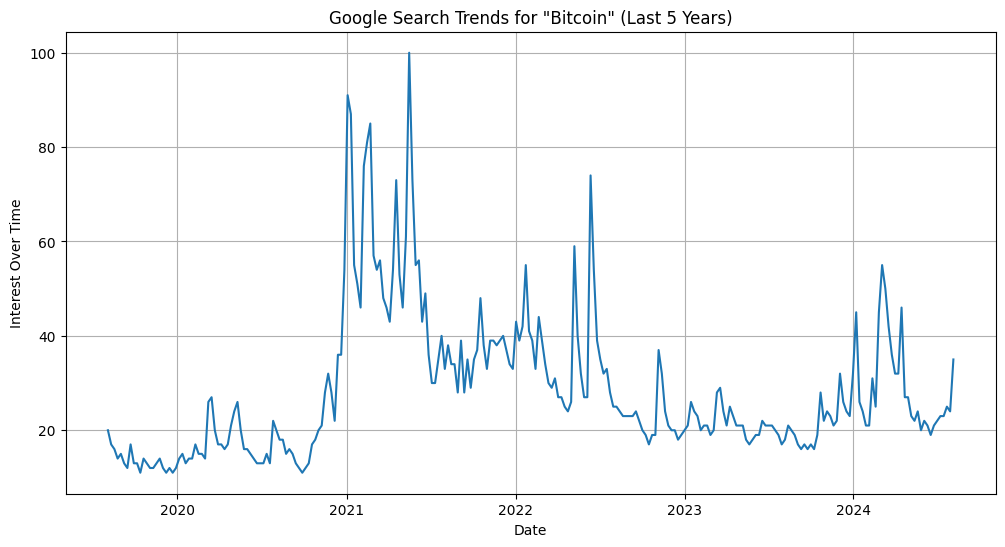

In [10]:
# @title Extracting and Plotting GOOGLE TRENDS data for Bitcoin.
!pip install pytrends
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)  # Initialize pytrends object

# Building payload with keywords and timeframe
kw_list = ["Bitcoin"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

# Getting interest over time
trend_data = pytrends.interest_over_time()
print(trend_data.head())

# Plotting the trend data
plt.figure(figsize=(12,6))
plt.plot(trend_data.index, trend_data['Bitcoin'])
plt.xlabel('Date')
plt.ylabel('Interest Over Time')
plt.title('Google Search Trends for "Bitcoin" (Last 5 Years)')
plt.grid(True)
plt.show()

In [13]:
# @title Create additional features, use the 'timestamp' from bitcoin_data
bitcoin_data['Day of Week'] = bitcoin_data['timestamp'].dt.day_name()

In [14]:
# @title Sentiment Analysis using VADER.

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Define or retrieve the headlines data here.
headlines = ["Positive headline about Bitcoin.", "Negative news about cryptocurrency regulations."]

# Analyzing sentiment for headlines
headlines_sentiment = [sia.polarity_scores(headline)['compound'] for headline in headlines]
sentiment_df = pd.DataFrame({'Headline': headlines, 'Sentiment': headlines_sentiment})

sentiment_df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Headline,Sentiment
0,Positive headline about Bitcoin.,0.5574
1,Negative news about cryptocurrency regulations.,-0.5719


In [15]:
# @title PART 2

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# checking 'Day of Week' column exists
if 'Day of Week' not in bitcoin_data.columns:
    bitcoin_data['Day of Week'] = bitcoin_data['timestamp'].dt.day_name()

# Preparing data
X = bitcoin_data[['Day of Week']]
y = bitcoin_data['price']  # Assuming 'price' is the target variable in bitcoin_data

encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Checking the shapes of the split data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# inspecting the first few rows of the split data
print("\nFirst few rows of X_train:")
print(X_train[:5])

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

X_train shape: (292, 7)
X_test shape: (73, 7)
y_train shape: (292,)
y_test shape: (73,)

First few rows of X_train:
  (0, 3)	1.0
  (1, 6)	1.0
  (2, 0)	1.0
  (3, 4)	1.0
  (4, 2)	1.0
Mean Squared Error: 277565967.78888744


In [16]:
# @title Saving Data in datasets.
prices.to_csv('bitcoin_prices.csv', index=False)
sentiment_df.to_csv('sentiment_analysis.csv', index=False)

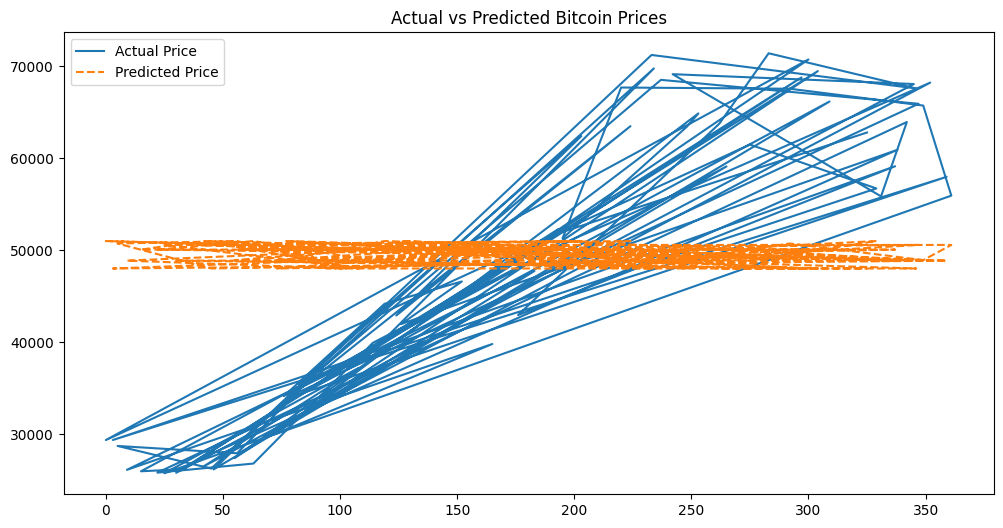

In [17]:
# @title Plot predictions vs actual prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Bitcoin Prices')
plt.show()

In [18]:
# @title PART 3
!pip install pytrends


In [19]:
# @title part 3
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(kw_list=['Bitcoin'], timeframe='today 1-m')
trend_data = pytrends.interest_over_time()

trend_data.head()

,Bitcoin,isPartial
date,,
2024-07-10,31,False
2024-07-11,35,False
2024-07-12,33,False
2024-07-13,27,False
2024-07-14,33,False


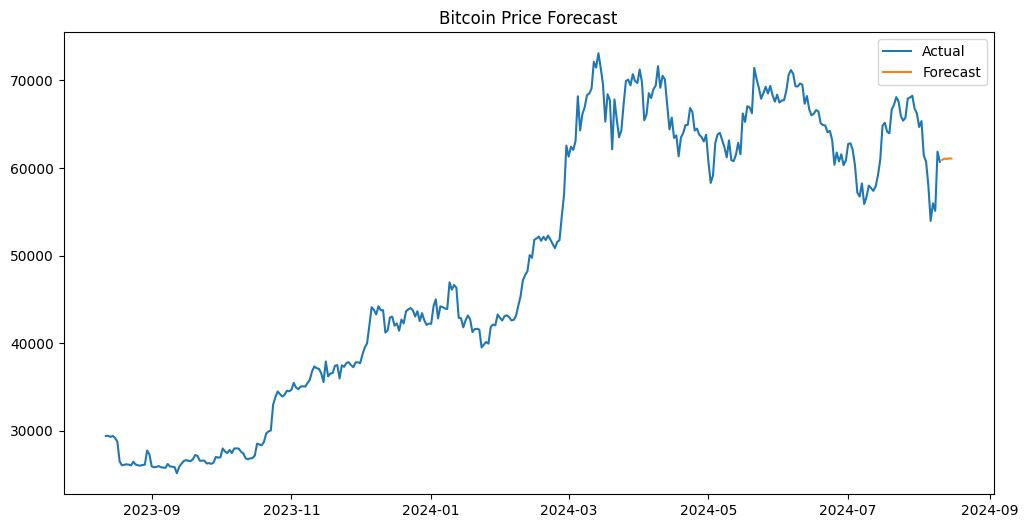

In [22]:
# @title ARIMA model

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(bitcoin_data['price'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next 5 days
forecast = model_fit.forecast(steps=5)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['timestamp'], bitcoin_data['price'], label='Actual')
plt.plot([bitcoin_data['timestamp'].iloc[-1] + pd.Timedelta(days=i) for i in range(1, 6)], forecast, label='Forecast')
plt.legend()
plt.title('Bitcoin Price Forecast')
plt.show()

In [23]:
# @title Investment Strategy Based on Forecast
if forecast.iloc[-1] > bitcoin_data['price'].iloc[-1]:
    recommendation = "Recommended: Buy Bitcoin"
else:
    recommendation = "Recommended: Sell Bitcoin"

print(recommendation)

Recommended: Buy Bitcoin
